In [10]:
using MortalityTables, Plots

### Summary of Actuarial Notation

${p}_{x}$ - probability of living from age x to age x+1

${q}_{x}$ - probability of death between ages $x$ and $x+1$

$_{n}{q}_{x}$ - probability of death between ages $x$ and $x+n$

$1 = {p}_{x}+{q}_{x}$ 

${A}_{x}$ - Present value of $1 of life insurance for a life age x

$\ddot{a}_{x}$ - Present value of a $1 life-contingent annuity due

${a}_{x}$ - Present value of a $1 life-contingent immediate annuity

## Introduction to Life Insurance

#### Interest Theory

With interest rates rising, banks are advertising Certificates of Deposites which earn 2% interest ($i$) for a year.

The `future value` of $c$ dollars invested today would be $$FV = c*(1+i)^{n}$$

Likewise, the `present value` can be calculated by discounting using
$$
v^{n} = \frac{1}{(1+i)^{n}} = (1+i)^{-n}$$
So the present value of a `1.00 dollar payment in 1 year` is worth
$$PV = FV*v = 1*(1+i)^{-1} =  0.98039...$$


#### Introducing probability

Suppose that you will only receive this dollar if you **survive the year** to claim it with probability $p$. 

If we assume that this `1 year survival`   $_{1}p$ is 99% then that present value decreases to
$$PV = FV * v^{1} * _{1}p = 0.98039 * 0.99 = 0.97059...$$

The payment of an amount conditioned upon the survival to time period $n$ for a life age $x$ is known as a `pure endowment` and is represented in actuarial notation as
$$_{n}E_{x} = _{1}p_{x}v^{n}$$


Because the compliment of surviving one year is the probability of `dying within 1 year` ($_{1}q$) then
$$_{1}p + _{1}q = 1$$

Then the present value of one dollar payable `at the end of 1 year | death` would be
$$_1q*v^1 = (1-_1p)v^{1} = (1-0.99)*0.98039...= 0.0098039...$$


#### Life contingencies

The previous example of a `1-year term insurance` **issued** to an individual at age $x$
$$_1q_x*v^{1} = A_x^{1} = 0.0098039$$

This is also commonly referred to as `Annual Renewable Term (ART)` or `Yearly Renewable Term (YRT)`

Once the term length $n$ extends beyond the first year, the probability of surviving to the next period needs to be accounted for as shown below for a `2-year term insurance`
$$A_x^{2} = _1q_x*v^1+_1p_x*_1q_{(x+1)}*v^2$$

The preceeding subscript for mortality and survival may be left off if it is only for one year
$$A_x^{2} = q_x*v^1+p_x*q_{(x+1)}*v^2$$

This formula can be extended for any duration $n$
$$A_x^{n} = q_x*v^1 + p_x*q_{(x+1)}*v^2 + ...p_{(x+n-1)}*q_{(x+n)}*v^n$$

If this coverage was issued to a 35 year old, then it would be represented as $A_{35}^{n} = q_{35}*v^1 + p_{35}*q_{(35+1)}*v^2 + ...p_{(35+n-1)}*q_{(35+n)}*v^n$

It is important to note that in the above example the 2nd year mortality probability was noted as $q_{(35+1)}$ rather than $q_{36}$ because _the mortality of a 36 year old may be different than the mortality of a 35 year old who survived for 1-year._

Before insurance is issued, the policyholder generally has to pass certain underwriting requirements (eg medical exams); therefore, it would be expected that the mortality of a 50 year-old $(q_{50})$ who just went through underwriting would be less than that of a 50 year old who went through underwriting 20 years ago $(q_{30+20})$. 

This period of lower mortality is referred to as the `select period`.

Because this reduced mortality deminishes (ie $q_{35} \leq q_{34+1} \leq q_{33+2}$) eventually there may be an `ultimate rate` used for a given **attained-age** where the age at issue does not matter; for example, if $q_{0+80} = q_{1+79} = q_{2+78} = ... = q_{80}$ then that mortality is the ultimate rate.

#### Valuation Basic Tables

Various mortality tables can be found on [https://mort.soa.org/](https://mort.soa.org/) and can be read across and then down.

For example, if using the [2001 Valuation Basic Table (VBT) Select and Ultimate Table - Male Nonsmoker](https://mort.soa.org/ViewTable.aspx?&TableIdentity=1149), then mortality for a non-smoking male issued to someone age 35 would follow:

In [30]:
vbt2001MN = MortalityTables.table("2001 VBT Select and Ultimate - Male Nonsmoker, ANB")
vbt2001MN.select[35]

86-element OffsetArray(::Vector{Float64}, 35:120) with eltype Float64 with indices 35:120:
 0.00031
 0.00041
 0.00052
 0.00063
 0.00073
 0.00084
 0.00094
 0.00104
 0.00115
 0.0013
 0.00149
 0.00172
 0.00198
 ⋮
 0.53905
 0.57031
 0.60339
 0.63838
 0.67541
 0.71458
 0.75603
 0.79988
 0.84627
 0.89536
 0.94729
 1.0

If issue-age was 35 and duration is now 25 (with attained age between 59 and 60) mortality would be

In [31]:
vbt2001MN.select[35][59]

0.00668

Afterward the ultimate rate would apply which is evident because the mortality for a 60 year old issued at age 35 is the same as the mortality for a 60 year old issued at age 25

In [26]:
vbt2001MN.select[35][60]

0.00776

In [27]:
vbt2001MN.select[25][60]

0.00776

In [28]:
vbt2001MN.ultimate[60]

0.00776

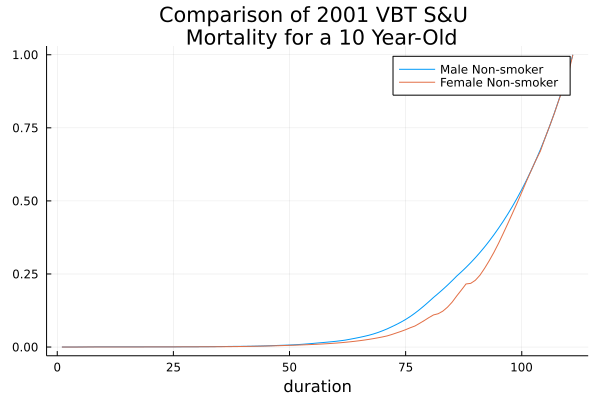

In [43]:
vbt2001FN = MortalityTables.table("2001 VBT Select and Ultimate - Female Nonsmoker, ANB")
issue_age = 10
mort = [
	vbt2001MN.select[issue_age][issue_age:end],
	vbt2001FN.select[issue_age][issue_age:end],
	     ]
plot(
	   mort,
	   label = ["Male Non-smoker" "Female Non-smoker"],
	   title = "Comparison of 2001 VBT S&U \n Mortality for a 10 Year-Old",
	   xlabel="duration")

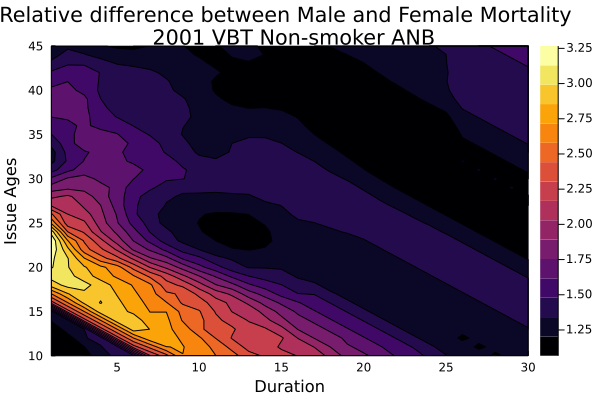

In [52]:
issue_ages = 10:45
durations = 1:30

# compute the relative rates with the element-wise division ("brodcasting" in Julia)
function rel_diff(a, b, issue_age,duration)
        att_age = issue_age + duration - 1
        return a[issue_age][att_age] / b[issue_age][att_age]
end


diff = [rel_diff(vbt2001MN.select,vbt2001FN.select,ia,dur) for ia in issue_ages, dur in durations]
contour(durations,
        issue_ages,
        diff,
        xlabel="Duration",ylabel="Issue Ages",
        title="Relative difference between Male and Female Mortality \n 2001 VBT Non-smoker ANB",
        fill=true
        )

The chart illustrates that male mortality is significantly higher than females for approximately ages 16-35 for non-smoking idividuals according to the 2001 VBT.

Like previous examples, these rates are for death in only a single year (ie $_1q_x$), but we could also represent mortality as the probability of death in the next $n$ years

$$_{n}q_x = q_x + p_x*q_{(x+1)} + p_x*p_{(x+1)}*q_{(x+2)} + ... $$
<center> Probability of death in the next n years = probability of dying in the next year + probability of living 1 year and dying the following year + probability of surviving this and the following year and dying in the third + ...</center> <br />

**Reminder** the probability of survival and death are mutually exclusive events; therefore, it is often easier to calculate the probability of surviving n years ($_np_x$) and calculate the compliment:
$$_np_x = p_x*p_{(x+1)}*p_{(x+2)}*...*p_{(x+n)}$$

$$1 = _np_x + _nq_x  \rightarrow  _nq_x = 1 - _np_x $$